# Basic Convolutional Neural Networks (CNN)
- Objective: create basic CNN models with Keras

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

<br>
- Fundamental CNN structures: CNNs are similar to MLPs since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs
    - ** Convolutional layer** : process data in a small receptive field (i.e., filter)
    - ** Pooling layer** : downsample along 2 dimensions (usually width and height)
    - ** Dense (fully connected) layer** : similar to hidden layers of MLPs

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 600px"/>
<br>
<center> **ConvNet architecture** </center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

### Load Datset
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [ ]:
data = datasets.load_digits()

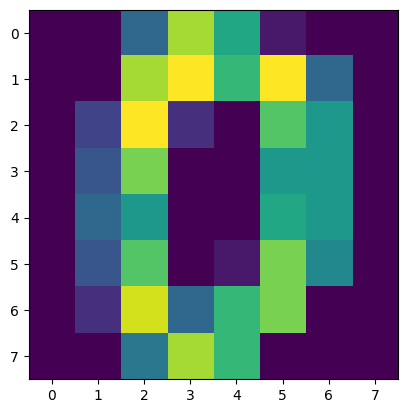

label:  0


In [ ]:
plt.imshow(data.images[0])    # show first number in the dataset
plt.show()
print('label: ', data.target[0])    # label = '0'

In [ ]:
X_data = data.images
y_data = data.target

In [ ]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [ ]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

In [ ]:
# one-hot encoding of y_data
y_data =  utils.to_categorical(y_data)

In [ ]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

### 1. Creating model
- Creating a model is same with MLP (Sequential)

In [ ]:
model = Sequential()

### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/
<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

In [ ]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, relu is used as well
- Doc: http://cs231n.github.io/assets/cnn/depthcol.jpeg

In [ ]:
model.add(Activation('relu'))

### 4. Pooling layer
- In general, max pooling method is used
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [ ]:
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

In [ ]:
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

In [ ]:
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

### 6. Model compile & train
- Identical to compiling MLP models

In [ ]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

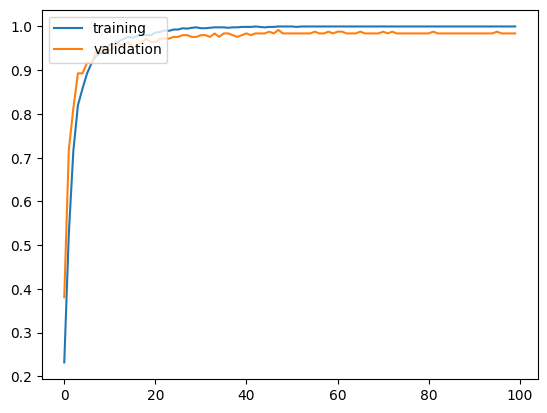

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9796


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.979629635810852


In [ ]:
X_test[0:1].shape

(1, 8, 8, 1)

In [ ]:
p = model.predict(X_test[0:1])


1/1 [==============================] - 0s 113ms/step


In [ ]:
data.images.shape

(1797, 8, 8)

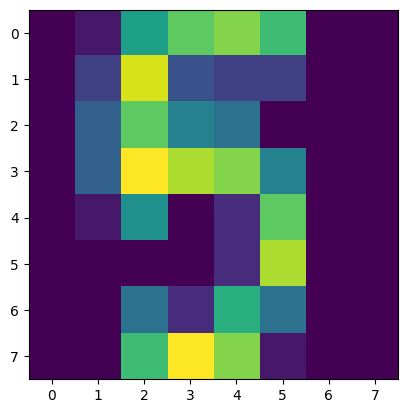

In [ ]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()


In [ ]:
p = np.argmax(p, axis = -1)
p

array([5])

Even simple CNN model shows fine performance of **97% **test accuracy